# Step 0: Import the data


In [1]:
# What sorts of people were likely to survive?
# predict which passengers survived the tragedy?

import pandas as pd
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [10]:
test.count(),train.count()

(PassengerId    418
 Pclass         418
 Name           418
 Sex            418
 Age            332
 SibSp          418
 Parch          418
 Ticket         418
 Fare           417
 Cabin           91
 Embarked       418
 dtype: int64, PassengerId    891
 Survived       891
 Pclass         891
 Name           891
 Sex            891
 Age            714
 SibSp          891
 Parch          891
 Ticket         891
 Fare           891
 Cabin          204
 Embarked       889
 dtype: int64)

In [54]:
train.shape, test.shape


((891, 12), (418, 11))

#missing value for Age, Cabin in both datasets
#embarked 2 missing from train
#Missing 1 in Fare in test dataset

# Step 1: specific to kaggle
join both training and testing datasets.
Reason for this: Titanic is actually what is considered a closed environment and 
we need all the data we can use to understand passengers information to determine if they survived or not.

We use append instead of Merge because append just append the data at the bottom of train and merge we need to merge using a common field.

you can also use concat to join both datasets

In [11]:
    ship = train.append(test, ignore_index = True) 

In [12]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [56]:
# show missing values
ship.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [13]:
ship.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [14]:
ship.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# step2: Business Understanding
We are trying to determine whether or not passengers from the test data set is going to survive or not & THEN submit to Kaggle for evalution.
Based off Titanic, the ship that sank in 1912 because some iceberg, 21% of passengers survived that ship sinking.

# Step 3: Data Understanding
In data undertanding, I'm going to investigate what is going on with missing data & probably decide which columns in particular matter in determining if somenone is going to survive or not.

### I'm going to Investigate Age first.
Age is basically how old( approximately) the person was when they boarded the ship. I'm going to see how many values are there , validate the Ages of people on the ship, & the decide what to do with missing values.

I expect Age to be a numerical & it is stored as a float in the data set so I should be running .decscribe() on it viewing the histogram of it.

all other fields are alphanumerical that's why they do not show.

In [15]:
ship['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

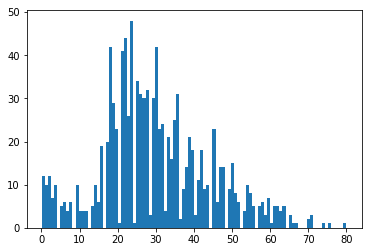

In [19]:
plt.hist(ship[ship['Age'].notnull()]['Age'],bins = 100);

For missing value with age we can feel by mean or mean is approximatly close to median.

### Is this column relevant to what to predict?
Does Age matter in predicting wheter someone survived
Age is numerical, but Survived is categorical. So the best way to setermine if Age matters in predicting Survived or not
I should run a Spearman'S Correlation, which describes the relationship between ranked categorical & numericals.

Another corrolation of pearson: only for continuous numerical veriables
spearman is categorical.

In [20]:
ship.corr(method = 'spearman')['Survived']

Age           -0.052565
Fare           0.323736
Parch          0.138266
PassengerId   -0.005007
Pclass        -0.339668
SibSp          0.088879
Survived       1.000000
Name: Survived, dtype: float64

In this case then Age does not matter in determining if someone survived or not, but we do know thatchildren survived 
the highest amoount in Titanic, therefore maybe Age does matter, but only in the context of children or not children.

Conclusion:

    1.Leave Age in , but fill with median or mean
    2. Take out Age all together
    3.Create a new column that only denotes if a person is a child or not.

## I'm going to Investigate Cabins.
I know that cabin is the exact cabin that the passengers stayed in. This is very specific information that might be hard to fill in, but I'm going to decide what to do with Cabin right now.

In [21]:
ship['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We suspect Cabin does not matter, because Cabin is so specific to a person & it is possible that the person was not even in 
the cabin when the iceberg Hit.<p> However, Cabin does try to estimate the person's location at the time of the iceberg, which is probably useful, BUT we might think that PClass summirized that better.

Conclusion:

    1.Take out Cabin & forget about it.
    2. Try to fill it in, showhow. With a cheatsheet, on Titanic.

# I'm going to investigate Fare and Embarked
Fare is how much someone paid to go onto the ship. Does it matter when we have their Pclass instead? Overall, does knowing how much someone paid for their ticket 

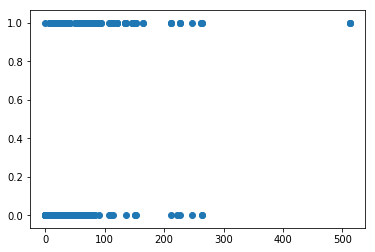

In [22]:
plt.scatter(ship['Fare'], ship['Survived'])

It looks like fare does not matter

(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

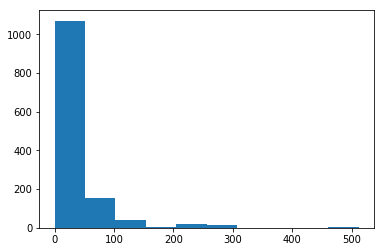

In [23]:
plt.hist(ship[ship['Fare'].notnull()]['Fare'])

Conclusion:
    
    1.I can leave fare in & I can fill the missing values with median.
    2.I can take Fare out & niot deal with it, because Pclass summarizes again: D

In [24]:
ship[ship['Fare']>=500]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755


In [25]:
ship.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [26]:
ship['Embarked'].mode()[0] # most people boarded from port S

'S'

Conclusion:

    1.Keep Embarked and fill with the mode
    2.or you can take it out.

# step 4: Data Preperation
It is good practice to make copies of your data before you can make changes, so when make a mistake, you can revert back to the data without too many issues or complications or mistakes or concerns or questions or stuff like that.

In [29]:
# make a copy of the the data
prep = ship.copy()

In [30]:
prep['Age'].fillna(prep['Age'].median(), inplace =True)

In [31]:
prep.drop('Cabin', axis = 1, inplace= True)

In [32]:
prep['Fare'].fillna(prep['Fare'].median(), inplace = True)

In [33]:
prep['Embarked'].fillna(prep['Embarked'].mode()[0], inplace = True) # Use the mode for categorical objects

In [35]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


Make dummies of the oject columns, but before that , we have to realize that not all the object columns matter.:
Embarked matters, Name does not matter, sex matter, & ticket does not matter
    

In [36]:
prep.drop('Name',axis = 1, inplace = True)
prep.drop('Ticket',axis = 1, inplace = True)

### Agian good practice to make another copy for checkpoint in changes

In [37]:
afterDummies = prep.copy() 
afterDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 92.1+ KB


In [38]:
#drop the first posibility beause multiculinary is a crime
# drop_first is the first column that have 1 value for each object , so 
#C will all have a value 1
#Q will all have a value 1
#S will all have a value 1
afterDummies =  pd.get_dummies(afterDummies, drop_first =True)

In [39]:
afterDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Sex_male       1309 non-null uint8
dtypes: float64(3), int64(4), uint8(3)
memory usage: 75.5 KB


# Step 5: Modeling


1.Because this is Kaggle , you have to unsplit the data, unsplit back to train & test. <p>
2.Designate your X & y variables.<p>
3.Train test split your data accordigly.<p>
4.Import Algorthms that you want to use.<p>
5.Fit the data onto the algorithm to generate the model.<p>
6.Calculate results & metrics to decide the best model.<p>
7.Create the submission csv Kaggle.<p>

1. Split the data back to original train and test from Kaggle.

In [40]:
# breaking the data again to train and test datasets
editTrain = afterDummies[:891]
editTest = afterDummies[891:]

In [41]:
editTrain.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_Q,Embarked_S,Sex_male
0,22.0,7.2500,0,1,3,1,0.0,0,1,1
1,38.0,71.2833,0,2,1,1,1.0,0,0,0
2,26.0,7.9250,0,3,3,0,1.0,0,1,0
3,35.0,53.1000,0,4,1,1,1.0,0,1,0
4,35.0,8.0500,0,5,3,0,0.0,0,1,1


2.Designate X and y variables.

In [42]:
X = editTrain.copy()
del X['Survived']
del X['PassengerId']
y = editTrain["Survived"].values

In [43]:
X.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_Q,Embarked_S,Sex_male
0,22.0,7.2500,0,3,1,0,1,1
1,38.0,71.2833,0,1,1,0,0,0
2,26.0,7.9250,0,3,0,0,1,0
3,35.0,53.1000,0,1,1,0,1,0
4,35.0,8.0500,0,3,0,0,1,1


3.Train test split

In [44]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = 77)

4.Import algorithms

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [46]:
# create alias for algorithms
r = RandomForestClassifier()
gb = GradientBoostingClassifier(n_estimators = 50)
l = LogisticRegression()
#k = NearestNeighbors()
d = DecisionTreeClassifier()
nb = GaussianNB()

5.Fit the Data

In [47]:
a= r.fit(X_train, y_train)
b= gb.fit(X_train, y_train)
c= l.fit(X_train, y_train)
#d= k.fit(X_train, y_train)
e= d.fit(X_train, y_train)
f= nb.fit(X_train, y_train)

6.Calculate results and matrics.

In [48]:
print(a.score(X_test, y_test))
print(b.score(X_test, y_test))
print(c.score(X_test, y_test))
print(e.score(X_test, y_test))
print(f.score(X_test, y_test))

0.7821229050279329
0.8044692737430168
0.7877094972067039
0.8156424581005587
0.7821229050279329


7.Create submission csv

In [49]:
Results = editTest.copy()
del Results['Survived']
del Results['PassengerId']

In [51]:
results = pd.DataFrame(columns = ['PassengerId', 'Survived'] )
results['PassengerId']= editTest['PassengerId']
results['Survived']= b.predict(Results)
results['Survived']= results['Survived'].astype(int)

In [52]:
results

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [53]:
results.to_csv('results.csv',index =False)